<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


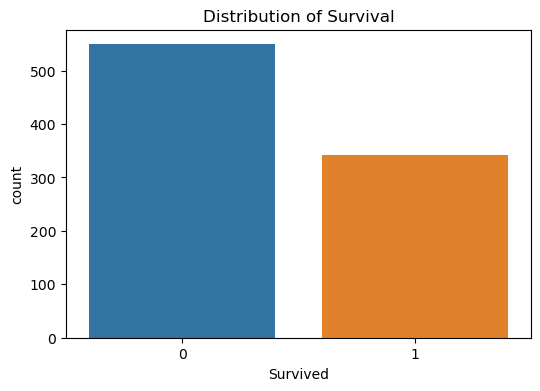

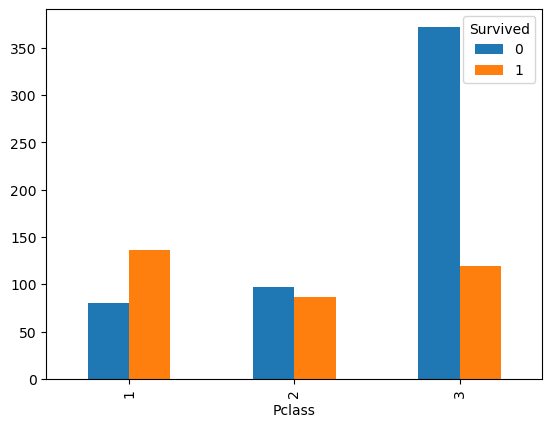

AgeGroup
Child          0.503597
Young Adult    0.331096
Adult          0.423237
Senior         0.343750
Name: Survived, dtype: float64


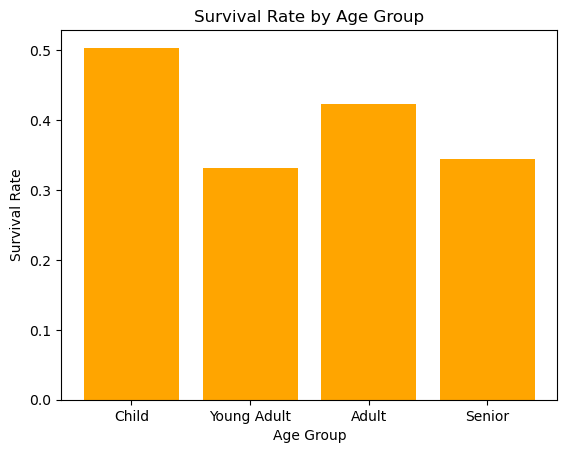

In [1]:
#Task-02
#Perform data cleaning and exploratory data analysis (EDA) on a dataset of your choice, such as the Titanic dataset from Kaggle. Explore the relationships between variables and identify patterns and trends in the data.

#Step 1:- Import Essential Libraries 
import pandas as pd 
import matplotlib. pyplot as plt 
import seaborn as sns

#Step 2:- Loading Dataset into DataFrame
data = pd.read_csv('train_yashwitha.csv')
data.head()

#Step 3:- Checking the info and description of the dataset 
data.info()

data.describe

#Step 4: - Perform Data Cleaning 
print(data.isnull().sum())

# Fill missing values for 'Age' with the median age
data['Age'].fillna(data['Age'].median(),inplace=True)

# Fill missing values for 'Embarked' with the mode
data['Embarked'].fillna(data['Embarked'].mode()[0],inplace=True)

data. drop (['PassengerId','Name','Ticket','Cabin'], axis=1,inplace=True)


# Step 5: Exploratory Data Analysis (EDA)
# Plot the distribution of 'Survived'
plt.figure(figsize=(6, 4))
sns.countplot(x='Survived', data=data)
plt.title('Distribution of Survival')
plt.show()


# Plot the distribution of 'Pclass' with respect to Survived'
counts = data.groupby(['Pclass', 'Survived']).size().unstack()
counts.plot(kind="bar")
plt.show()


# Calculate the survival rate by age group
data['AgeGroup']=pd.cut(data['Age'], bins=[0, 18, 30, 50, 100], labels=['Child', 'Young Adult', 'Adult', 'Senior'])
survival_by_agegroup = data.groupby('AgeGroup')['Survived'].mean()
print(survival_by_agegroup)


# Plot a histogram for survival rate by age group
plt. bar (survival_by_agegroup.index, survival_by_agegroup. values, color="orange")
plt.xlabel('Age Group')
plt.ylabel('Survival Rate')
plt.title('Survival Rate by Age Group')
plt.show()